# Standard PCA - Drop Peptides not in ALL samples 

**Standard PCA**: Ratio values are normalized on IP2, so no further normaliation is performed. Peptides not appearing in all samples used for PCA plot are dropped in order to minimize variation between samples.  Lot's of variation appears from MS run to MS run, and this picked up as primary source of variation if all peptides are kept (see the KeepAllPeps notebook)

In [1]:
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
from scripts import census_parser as cp
%matplotlib inline

In [2]:
BASE_DIR = '../data'
l_tail = 'rawXtractor/census-out.txt'
h_tail = 'rawXtractor/n15_search/census-out.txt'

In [3]:
def make_pca_df(samples, group = '', clean = False):
    dfs = []
    for sample in samples:
        light_file = os.path.join(BASE_DIR, sample, l_tail)
        heavy_file = os.path.join(BASE_DIR, sample, h_tail)
        dfs.append(list(cp.parse_l_h_together(light_file, heavy_file, only_s = True))) 
    if group:
        return cp.prep_for_pca(dfs, name = group, clean = clean)
    return cp.prep_for_pca(dfs, clean = clean)

---

## Plot PCA for different Sample Combinations

### Fist All unenriched samples collected so far

In [4]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121', '20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111', '20160331-UnerFecal-Lys-N14N15-Pool']

In [5]:
df = make_pca_df(samples, clean = True)

Starting peptides:  4727
Peptides after Cleaning:  105


explained variance ratios: [ 0.29639278  0.1781974 ]


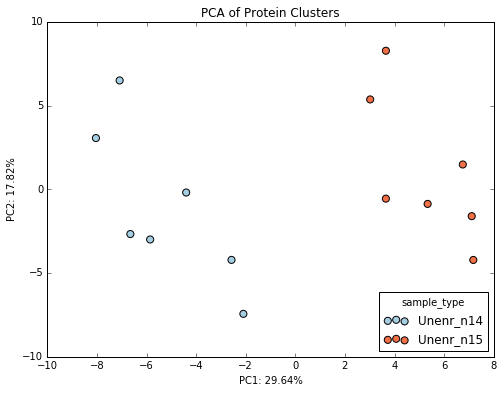

In [6]:
cp.plot_pca(df, loc = 4)

explained variance ratios: [ 0.29639278  0.1781974 ]


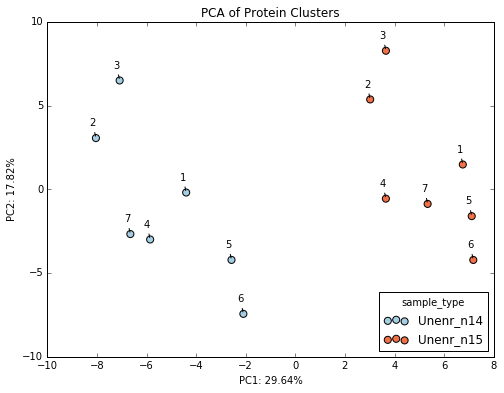

In [7]:
cp.plot_pca(df, labels = True, loc = 4)

### Just the Peptides from samples collected on 11/11/2015

In [8]:
samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
df = make_pca_df(samples, clean = True)

Starting peptides:  2768
Peptides after Cleaning:  500


explained variance ratios: [ 0.43030963  0.29179209]


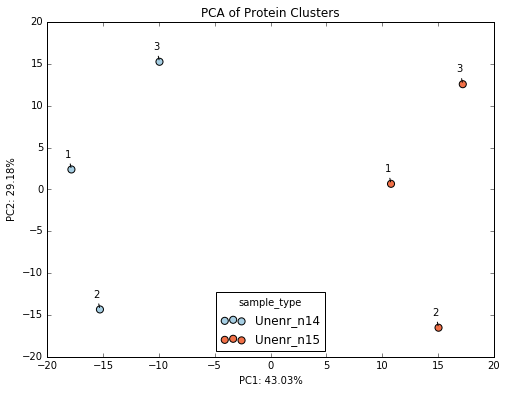

In [9]:
cp.plot_pca(df, labels = True, loc = 8)

### Just the smaples collected on 11/21

In [10]:
samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
df = make_pca_df(samples, clean = True)

Starting peptides:  2474
Peptides after Cleaning:  415


explained variance ratios: [ 0.4166485   0.32020632]


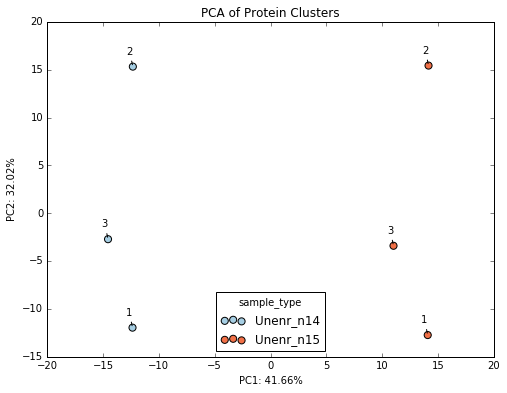

In [11]:
cp.plot_pca(df, loc = 8, labels = True)

## PCA Plot for the Enriched Samples Only

In [12]:
samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [13]:
df = make_pca_df(samples, clean = True, group = 'BioGlyCMK')

Starting peptides:  3102
Peptides after Cleaning:  495


explained variance ratios: [ 0.47539324  0.27123463]


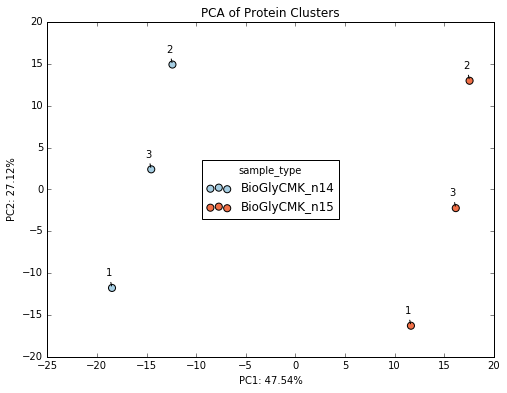

In [14]:
cp.plot_pca(df, loc = 10, labels = True)

## Looking at a PCA with both the Unenriched and Enriched samples  - 

### Start with just 11/11 collection for Unenriched Dataset

In [15]:
unen_samples = ['20160216-UnerFecal-Lys-N14N15-1111', '20160219-UnerFecal-Lys-N14N15-1111', '20160220-UnerFecal-Lys-N14N15-1111']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

In [16]:
dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = cp.clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  4723
Peptides after Cleaning:  176


explained variance ratios: [ 0.33263632  0.23378497]


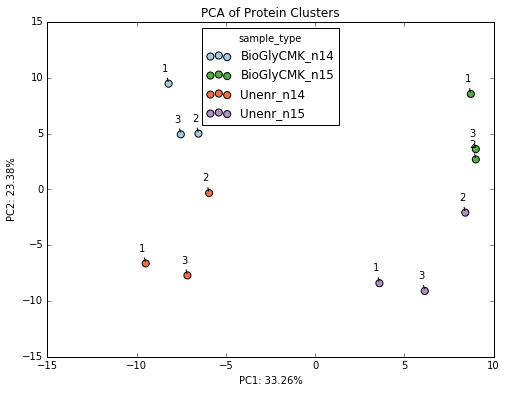

In [17]:
cp.plot_pca(df, loc = 9, labels = True)

Looks like there's still some good separation between n14 and n15, but there is also a separation between the probe enriched samples and the unenriched samples.  There is still a really strong mirror between N14 and N15 samples of the same MS run.

### Looking at Unenriched samples collected on 11/21/15

In [18]:
unen_samples = ['20160122-UnerFecal-Lys-N14N15-1121', '20160126-UnerFecal-Lys-N14N15-1121', '20160127-UnerFecal-Lys-N14N15-1121']
enr_samples = ['20160409-BioGlyCMK-Lys-N14N15-Pool', '20160506-BioGlyCMK-Lys-N14N15-Pool', '20160508-BioGlyCMK-Lys-N14N15-Pool']

dfa = make_pca_df(unen_samples)
dfb = make_pca_df(enr_samples, group = 'BioGlyCMK')
df = cp.clean_pca_df(pd.concat([dfa, dfb]))

Starting peptides:  4909
Peptides after Cleaning:  71


explained variance ratios: [ 0.33090082  0.27782601]


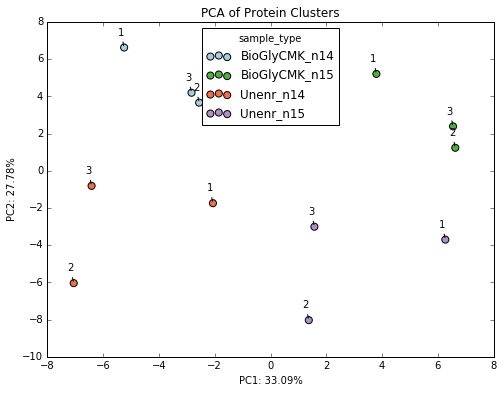

In [19]:
cp.plot_pca(df, loc=9, labels = True)